# Plot CKA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [3]:
def smooth_sequence(sequence):
    sequence_normalized = []
    for i in range(len(sequence) // 2):
        sequence_normalized.append(sequence[i * 2: (i + 1) * 2].mean())
    sequence = np.array(sequence_normalized)
    return sequence

def get_large_cka_module_name(cka_diag, cka_threshold):
    block_name_list = [
        'ln_1',
        'attn.c_attn',
        'attn.c_proj',
        'attn.resid_dropout',
        'ln_2',
        'mlp.c_fc',
        'mlp.c_proj',
        'mlp.act',
        'mlp.dropout'
    ]
    layer_name_list = []
    for i in range(12):
        for block_name in block_name_list:
            layer_name_list.append(str(i) + '.' + block_name)
    module_idx_large_cka = list(np.where(cka_diag > cka_threshold)[0])
    module_name_large_cka = [layer_name_list[module_id] for module_id in module_idx_large_cka]

    return module_name_large_cka

Large CKA modules: 
 ['0.ln_1', '0.attn.c_attn', '0.ln_2', '0.mlp.c_fc', '0.mlp.c_proj', '0.mlp.dropout', '1.ln_1', '1.attn.c_attn', '1.ln_2', '2.ln_1', '2.ln_2', '3.ln_1', '3.ln_2', '3.mlp.c_fc', '4.ln_1', '4.attn.c_attn', '4.ln_2', '5.ln_1', '5.attn.c_attn', '5.ln_2', '6.ln_1', '6.attn.c_attn', '6.ln_2', '7.ln_1', '7.ln_2', '8.ln_1', '8.ln_2', '9.ln_1', '9.ln_2', '10.ln_1', '10.attn.c_attn', '10.ln_2', '11.ln_1', '11.ln_2']


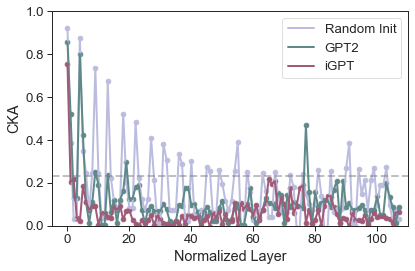

In [4]:
seed = 666
epoch = 40
env_name = 'hopper'
rtg_state_action = 'state'
model_names = ['dt', 'gpt2', 'igpt']
colors = {'gpt2': (0.372, 0.537, 0.537), 'igpt': (0.627, 0.352, 0.470), 'dt': (0.733, 0.737, 0.870)}
labels = {'gpt2': 'GPT2', 'igpt': 'iGPT', 'dt': 'Random Init'}
cka_threshold_rand_init = 0.23

for model_name in model_names:
    cka_diag = np.diag(np.load(f'results/cka_0_{epoch}_{model_name}{model_name}_{env_name}_medium_{seed}_{rtg_state_action}.npy'))
    if model_name == 'igpt':
        cka_diag = smooth_sequence(cka_diag)
    
    plt.plot(cka_diag, color=colors[model_name], label=labels[model_name])
    plt.scatter(np.arange(len(cka_diag)), cka_diag, color=colors[model_name])

    if model_name == 'dt' and env_name == 'hopper' and rtg_state_action == 'state':
        plt.hlines(y=cka_threshold_rand_init, xmin=-5, xmax=110, color='gray', linestyles='dashed', alpha=0.5)
        module_name_large_cka = get_large_cka_module_name(cka_diag, cka_threshold_rand_init)
        print(f'Large CKA modules: \n {module_name_large_cka}')

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_gpt2_igpt_dt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()